In [10]:
### all the necessary imports

# python script imports
import sys
sys.path.insert(0, '../scripts')
from sparkshape import *

# This is copied from tutorial 1
from pyspark.sql import SparkSession

# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName("MAST30034 Tutorial 1")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.executor.memory", "2g")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

# other imports
from pyspark.sql.functions import col
from pyspark.sql.functions import unix_timestamp

22/08/18 11:20:17 WARN Utils: Your hostname, MSI resolves to a loopback address: 127.0.1.1; using 192.168.207.1 instead (on interface eth1)
22/08/18 11:20:17 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/18 11:20:18 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# let's import all the green taxi data for the year 2019 and take a closer look into what the data looks like
sdf_g = spark.read.parquet("../data/raw/green/")
sdf_g.printSchema()
sdf_g.show()

root
 |-- VendorID: long (nullable = true)
 |-- lpep_pickup_datetime: timestamp (nullable = true)
 |-- lpep_dropoff_datetime: timestamp (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- ehail_fee: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- payment_type: double (nullable = true)
 |-- trip_type: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)

+--------+--------------------+---------------------+------------------+----------+------------+-

In [3]:
# Alright! Now that I've had a good idea what this data looks like, let's remove ehail_fee out of the data 
# because the values in ehail_fee are always null. I also need data for the length of each trip, and that is acquired by calculating
# the difference between lpep_pickup_datetime and lpep_dropoff_datetime.
time_diff = unix_timestamp("lpep_dropoff_datetime") - unix_timestamp("lpep_pickup_datetime")
sdf_g = sdf_g.drop(col("ehail_fee"))
sdf_g = sdf_g.withColumn("trip_duration", time_diff)

In [4]:
# save this as a new parquet file
sdf_g.write.mode("overwrite").parquet("../data/curated/green")
# to copy what tute1 said: "Your directory might look a bit funky. Don't worry, just leave it as is,
# (we don't have time to cover everything about Spark unfortunately) and you can just read in the directory as is."
# I TAKE YOUR WORD FOR THIS, OKAY!!

22/08/10 12:12:35 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 96.54% for 7 writers
22/08/10 12:12:35 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 84.47% for 8 writers
22/08/10 12:12:42 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 96.54% for 7 writers


22/08/10 12:12:42 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 96.54% for 7 writers
22/08/10 12:12:43 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 84.47% for 8 writers
22/08/10 12:12:43 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 96.54% for 7 writers


Now, do the same thing (yes, same exact thing) for the yellow taxi data.

In [11]:
sdf_y = spark.read.parquet("../data/raw/yellow/2019-01.parquet")
sdf_y.printSchema()
sdf_y.show()

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: integer (nullable = true)



+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       1| 2019-01-01 00:46:40|  2019-01-01 00:53:20|            1.0|          1.5|       1.0|                 N|         151|         239|           1|        7.0|  0.5|    0.5|      1.6

It seems like there is no ehail_fee unlike the green data. All is good to proceed to the next step.

In [12]:
time_diff = unix_timestamp("tpep_dropoff_datetime") - unix_timestamp("tpep_pickup_datetime")
sdf_y = sdf_y.withColumn("trip_duration", time_diff)
sdf_y = sdf_y.select(col("tpep_pickup_datetime"), col("tpep_dropoff_datetime"), col("trip_distance"), \
    col("trip_duration"), col("PULocationID"), col("DOLocationID"))
sdf_y = sdf_y.sort(col("tpep_pickup_datetime"),col("tpep_dropoff_datetime"))

In [13]:
sdf_y.collect()[0][0]

ERROR:root:KeyboardInterrupt while sending command.                 (3 + 6) / 9]
Traceback (most recent call last):
  File "/home/andrew/.local/lib/python3.8/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/home/andrew/.local/lib/python3.8/site-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.8/socket.py", line 669, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [7]:
for i in range(1, 13):
    if i < 10:
        sdf_y = spark.read.parquet("../data/raw/yellow/2019-0" + str(i) + ".parquet")
        time_diff = unix_timestamp("tpep_dropoff_datetime") - unix_timestamp("tpep_pickup_datetime")
        sdf_y = sdf_y.withColumn("trip_duration", time_diff)
        sdf_y.write.mode("overwrite").parquet("../data/curated/yellow/2019-0" + str(i))
    else:
        sdf_y = spark.read.parquet("../data/raw/yellow/2019-" + str(i) + ".parquet")
        time_diff = unix_timestamp("tpep_dropoff_datetime") - unix_timestamp("tpep_pickup_datetime")
        sdf_y = sdf_y.withColumn("trip_duration", time_diff)
        sdf_y.write.mode("overwrite").parquet("../data/curated/yellow/2019-" + str(i))

22/08/10 14:19:14 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 904277 ms exceeds timeout 120000 ms
22/08/10 14:19:14 WARN SparkContext: Killing executors is not supported by current scheduler.


On a day-to-day basis, compare a number of attributes to the total number of crashes in that timeframe.
In one day, the rows are further broken down into: the month (to account for the average weather condition), the daylight (day or night), the most common human waking hours (11 PM to 7 AM vs the rest of the day), and rush hours [FOR WEEKDAYS AND NON-PUBLIC HOLIDAYS ONLY].

For the rush hours, the TLC defines it as a period between 4 PM to 8 PM, which is arbitrary because there should be rush hours in the morning as well. The true time period of rush hours can be obtained by measuring the average speed of all taxi trips measured on that day. However, that arbitrary definition should be good enough to use because, (1) there will be a significant increase in the amount of time and effort to analyse the average speed data day-by-day, (2) chances are the most of the period between 4 to 8 PM will overlap with the actual true period measured by taxi speed, (3) the speed difference during the day between the rush and non-rush hours might not be too big anyway, compared to the speed difference between day and night.

For the waking vs non-waking hours, it is again somewhat arbitrary, but it's pretty close to the data gathered by Sleep Cycle.
https://www.sleepcycle.com/sleep-science/what-we-know-about-americas-healthiest-happiest-best-rested/

Unfortunately, there is no data for the education status, income, age, and driving experience for taxi drivers in new york, as a significant amount of crashes are caused by human errors and disobeyment of road rules. So, we gotta make do with what we got.


1. Read twilight data, convert datetime into three columns of data: one for the month, one for day or night taken from the twilight data, one for the peak hour or non-peak hour.
2. That makes it three attributes. The fourth one is the number of trips completed per instance, from the yellow plus green taxi data.
3. On the weekends and public holidays, there will be no rush vs non-rush hours, there will just be another value in the attribute labelled "OFF" in the rush_hours column.
4. In addition, the average human waking vs sleeping hours will be included.
5. The location of the crash is probably the most complicated part. Join location and get its location ID from the crash data. (note: rtree or pygeos need to be installed)
7. Any additional attributes will be improvised along the way.

ANALYSIS
1. Definitely linear regression.
2. What else, I don't know.

attributes:   ["month, daylight, waking_hours, rush_hours, locationID, num_victims (injured + killed), num_vehicles_involved, total_num_of_taxi_trips]
response: ["total number of crashes"]


1. Read twilight data, convert datetime into three columns of data: one for the month, one for day or night taken from the twilight data, one for the peak hour or non-peak hour.
2. The rush or peak hours will be obtained by the average speed in which the taxis travel in a given time, every 10 minutes. The trend then can be seen smoothly in a graph. (maybe divide into 3 section: one for rush hours, one for normal, and one for really empty streets where vehicles can go so fast)
3. Do this on the weekends and public holidays as well.
See the trends, and decide which hours to divide.
4. In addition, the average human waking vs sleeping hours will be included.
5. The location of the crash is probably the most complicated part. Join location and get its location ID from the crash data.
7. Any additional attributes will be added and improvised along the way.

-------------------------------------------------------------------------------------------------------------------------------------------------

Okay, I'm **done** with spark. The iloc[] equivalent to pandas (collect()) is broken and seems to be taking forever to run, the timezone is messed up and the "timestamp" data type doesn't match properly with datetime(), so there is no way to precisely see data outside of 2019 nor there is a way to filter out specific dates to find out weekdays/weekends and public holidays, nor there is an accurate way to see day vs night.

Moving on to the ol' reliable pandas.

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
pdf = pd.read_parquet("../data/raw/yellow/2019-01.parquet")  # pdf = parquet data frame

# drop useless columns
pdf = pdf.drop(columns=["VendorID", "passenger_count", "RatecodeID", "store_and_fwd_flag", "payment_type", "fare_amount", "extra", "mta_tax" ,\
    "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "congestion_surcharge", "airport_fee"])
# filter out non-2019 data
pdf = pdf[pdf["tpep_dropoff_datetime"] > datetime(2018, 12, 31)]
pdf = pdf[pdf["tpep_pickup_datetime"] < datetime(2020, 1, 1)]
pdf.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.5,151,239
1,2019-01-01 00:59:47,2019-01-01 01:18:59,2.6,239,246
7,2019-01-01 00:21:28,2019-01-01 00:28:37,1.3,163,229
8,2019-01-01 00:32:01,2019-01-01 00:45:39,3.7,229,7
9,2019-01-01 00:57:32,2019-01-01 01:09:32,2.1,141,234


In [4]:
# find out the trip duration
pdf["trip_duration"] = pdf["tpep_dropoff_datetime"] - pdf["tpep_pickup_datetime"]
# in minutes (float)
pdf["trip_duration"] = pdf["trip_duration"] / np.timedelta64(1, "m")
pdf.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,trip_duration
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.5,151,239,6.666667
1,2019-01-01 00:59:47,2019-01-01 01:18:59,2.6,239,246,19.200000
7,2019-01-01 00:21:28,2019-01-01 00:28:37,1.3,163,229,7.150000
8,2019-01-01 00:32:01,2019-01-01 00:45:39,3.7,229,7,13.633333
9,2019-01-01 00:57:32,2019-01-01 01:09:32,2.1,141,234,12.000000


## 1: Speed

In [33]:
# find out the average speed of each trip (miles/minute)
pdf["avg_speed"] = pdf["trip_distance"] / pdf["trip_duration"]
pdf.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,trip_duration,avg_speed
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.5,151,239,6.666667,0.225000
1,2019-01-01 00:59:47,2019-01-01 01:18:59,2.6,239,246,19.200000,0.135417
7,2019-01-01 00:21:28,2019-01-01 00:28:37,1.3,163,229,7.150000,0.181818
8,2019-01-01 00:32:01,2019-01-01 00:45:39,3.7,229,7,13.633333,0.271394
9,2019-01-01 00:57:32,2019-01-01 01:09:32,2.1,141,234,12.000000,0.175000


Before proceeding any further, we must first see and assess outliers, because I *know* there will be outliers in this big messy data.

In [34]:
pdf2 = pdf.copy()
pdf2 = pdf2.sort_values("avg_speed", ascending=True)
print(pdf2.head(3))
pdf2.tail(3)

        tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  \
4741746  2019-01-20 15:15:30   2019-01-18 15:57:16            1.9   
2517596  2019-01-11 19:24:47   2019-01-11 19:24:49            0.0   
2332498  2019-01-11 08:10:07   2019-01-11 08:10:15            0.0   

         PULocationID  DOLocationID  trip_duration  avg_speed  
4741746           186           162   -2838.233333  -0.000669  
2517596           264             7       0.033333   0.000000  
2332498           191           191       0.133333   0.000000  


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,trip_duration,avg_speed
7696097,2019-01-31 11:54:00,2019-01-31 11:54:00,0.0,161,161,0.0,NaN
7696210,2019-01-31 14:10:00,2019-01-31 14:10:00,0.0,263,263,0.0,NaN
7696372,2019-01-31 16:03:00,2019-01-31 16:03:00,0.0,231,231,0.0,NaN


In [37]:
# It is then pretty intuitive and straightforward that zero, NaN, negative, and infinity values should be removed.

pdf2.replace([np.inf, -np.inf], np.nan, inplace=True)  # inf and -inf
pdf2.dropna(subset=["avg_speed"], inplace=True)        # NaN
pdf2 = pdf2[pdf2["avg_speed"] > 0]                     # negative and 0 values

print(pdf2.head(3))
pdf2.tail(3)


        tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  \
2880939  2019-01-13 03:34:15   2019-01-14 03:26:10           0.01   
2880940  2019-01-13 03:34:15   2019-01-14 03:26:10           0.01   
4646276  2019-01-20 00:53:01   2019-01-21 00:33:16           0.01   

         PULocationID  DOLocationID  trip_duration  avg_speed  
2880939           234           234    1431.916667   0.000007  
2880940           234           234    1431.916667   0.000007  
4646276           158           158    1420.250000   0.000007  


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,trip_duration,avg_speed
2467602,2019-01-11 17:00:20,2019-01-11 17:00:21,20.0,87,87,0.016667,1200.0
2841025,2019-01-12 23:30:17,2019-01-12 23:30:22,100.8,162,162,0.083333,1209.6
6218867,2019-01-26 12:30:57,2019-01-26 12:30:58,20.4,132,132,0.016667,1224.0


<AxesSubplot:>

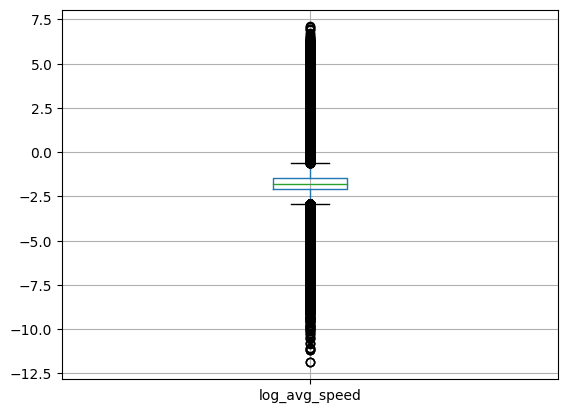

In [38]:
# All that's left to remove are massive outliers that don't really make sense logically. I mean, I'd love to travel at 1200 miles/minute,
# but unfortunately, they are the way they are becuse the data didn't record the trip distance or/and the trip duration properly.
pdf2["log_avg_speed"] = np.log(pdf2["avg_speed"])  # log transform to make the graph more readable
#pdf2
pdf2.boxplot(column=["log_avg_speed"])

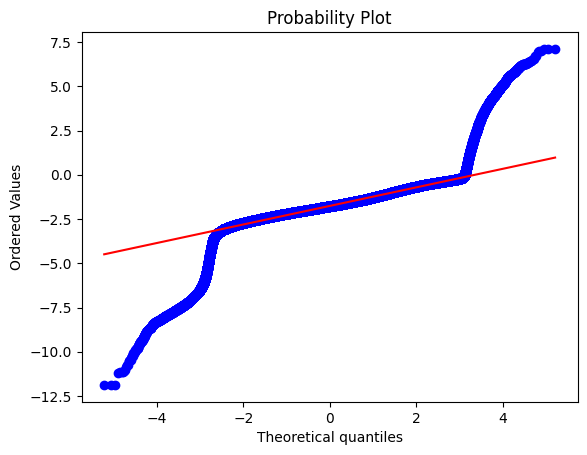

In [46]:
# After looking at the graph and converting the approximate average value to km/h, it is then starting to look logical with the 
# average speed value around 20km/h. Now, from here, although the 1.5 * IQR value method to find outliers is not perfect,
# I'd say it is the best, fastest, and simplest method because the distribution of the data is unknown (no, the data is NOT
# normally distributed, proof below).
avg_speed = pdf2["log_avg_speed"].to_numpy()

from scipy import stats
import pylab

stats.probplot(avg_speed, dist="norm", plot=pylab)
pylab.show()

<AxesSubplot:>

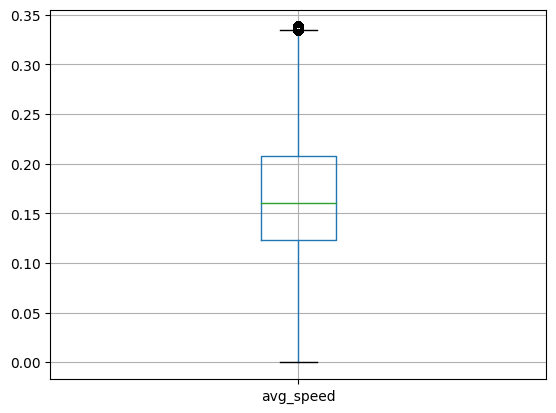

In [58]:
# find and remove outliers
q1 = pdf2["avg_speed"].quantile(0.25)
q3 = pdf2["avg_speed"].quantile(0.75)
iqr = q3 - q1

pdf2 = pdf2[pdf2["avg_speed"] > q1 - 1.5 * iqr]
pdf2 = pdf2[pdf2["avg_speed"] < q3 + 1.5 * iqr]
pdf2.boxplot(column=["avg_speed"])

In [59]:
pdf2.shape[0]

6934520

In [63]:
# the speed data for every nth minute in one day is going to be stored in a 2d list, consisting of 1440 * x elements.
# note: 1440 is the number of minutes in 24 hours, and x is the avg_speed data when (a) trip(s) occurs at the nth minute.

# ...
# I'm only doing the January data, currently I'm 23 minutes in and Python is still not done processing the for loop. 
# The projected time for this loop to end is more than 30 minutes, which puts me at... *calculator noises* ...more than 6 hours to process
# all 12 months worth of dataset. Patience has a limit, am I right.
# I guess the only solution to this is to randomly sample the entire 2019 dataset by 0.001% or smaller, because this 
# current method seems like hell. I believe doing this on pyspark (instead of pandas) wouldn't help at all, 
# because it will still take a while to loop a bunch of commands 80 million times.
# ...

# the speed data for every nth hour in one day is going to be stored in a 2d list, consisting of 24 * x elements.
# note: 24 is the number of hours in one day, and x is the avg_speed data when (a) trip(s) occur(s) at the nth hour.

import random
N_MIN = 1440

# initialise list
speed_data = np.array([])
for i in range(N_MIN):
    np.append(speed_data, [])

# randomly sample the speed data
pdf3 = pdf2.copy()
pdf3.sample(frac=0.01)

# fill in the values
for i in range(pdf3.shape[0]):
    if i == 1096519:
        print(i)
    if i == 2396519:
        print(i)
    if i == 4096519:
        print(i)
    if i == 5796519:
        print(i)
    # the average speed value for the ith trip
    avg_speed = pdf3.iloc[i, -1]

    
    pu_day = pdf3.iloc[i, 0].timetuple().tm_yday
    # pick up time, in the number of hours elapsed starting from 00:00
    pu_hour = pdf3.iloc[i, 0].timetuple().tm_hour
    pu_min = pdf3.iloc[i, 0].timetuple().tm_min + 1  # rounding up, because tm_sec exists (why? explained in report, 
                                                    # if the page limit allows...otherwise, think about it yourself, it's pretty intuitive)
    pu_time = 60 * pu_hour + pu_min

    
    do_day = pdf3.iloc[i, 1].timetuple().tm_yday
    # drop off time, in the number of hours elapsed starting from 00:00
    do_hour = pdf3.iloc[i, 1].timetuple().tm_hour
    do_min = pdf3.iloc[i, 1].timetuple().tm_min
    do_time = 60 * do_hour + do_min


    # if the trip starts at a particular day and ends at the next day
    if do_day != pu_day:
        do_hour += N_MIN

    while pu_time <= do_time:
        if pu_time >= N_MIN:
            np.append(speed_data[pu_time - N_MIN], avg_speed)
        else:
            np.append(speed_data[pu_time], avg_speed)
        pu_time += 1

speed_data

IndexError: index 1 is out of bounds for axis 0 with size 0

In [72]:
speed_data = np.array([[], []])
for i in range(1440):
    np.append(speed_data, [100])
speed_data

array([], shape=(2, 0), dtype=float64)

In [61]:
x = pdf.shape[0]
print(range(x))
x_sampled = random.sample((x), x/100)
x_sampled

range(0, 7696519)


TypeError: can't multiply sequence by non-int of type 'float'